In [169]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [170]:
combined = pd.read_csv('combined.csv')
combined.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Ht,Ins_Age,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_1,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_2,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_3,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_4,Medical_History_40,Medical_History_41,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_Keyword_1,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_2,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Response,Wt
0,0.323008,0.028,12,1,0.0,3,NaN,2,0.581818,0.641791,1,1,3,1,1,1,2,1,2,6,3,1,2,1,4.0,3,2,3,3,3,3,1,1,112,2,1,2,3,1,3,3,1,3,2,2,3,1,3,1,2,2,1,3,1,3,3,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D3,10,0.076923,2,1,1,8,0.148536
1,0.272288,0.000,1,3,0.0,2,0.0018,2,0.600000,0.059701,2,1,3,1,1,3,2,1,2,6,3,1,2,1,5.0,3,2,3,3,1,3,1,1,412,2,1,2,3,1,3,3,1,3,2,2,3,3,1,1,2,2,1,3,1,3,1,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,A1,26,0.076923,2,3,1,4,0.131799
2,0.428780,0.030,9,1,0.0,2,0.0300,3,0.745455,0.029851,2,1,1,3,3,2,3,1,2,8,3,1,1,1,10.0,3,2,3,3,1,3,1,1,3,2,1,2,3,2,2,3,1,3,2,2,3,3,3,1,3,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,E1,26,0.076923,2,3,1,8,0.288703
3,0.352438,0.042,9,1,0.0,3,0.2000,3,0.672727,0.164179,2,1,1,3,3,2,3,2,2,8,3,1,2,1,0.0,3,2,3,3,1,3,1,1,350,2,2,2,3,1,3,3,1,3,2,2,3,3,3,1,2,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D4,10,0.487179,2,3,1,8,0.205021
4,0.424046,0.027,9,1,0.0,2,0.0500,2,0.654545,0.417910,2,1,1,3,3,2,3,1,2,6,3,1,2,1,NaN,3,2,3,3,1,3,1,1,162,2,1,2,3,2,2,3,1,3,2,2,3,3,3,1,3,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D2,26,0.230769,2,3,1,8,0.234310


In [171]:
data_features = combined
len(data_features)

59381

In [172]:
features_with_nulls = {k:v for k, v in data_features.isnull().apply(sum).to_dict().items() if v > 0}
features_with_nulls

{'Employment_Info_1': 19,
 'Employment_Info_4': 6779,
 'Employment_Info_6': 10854,
 'Medical_History_1': 8889}

In [173]:
data_features["Medical_History_1"].median()

4.0

In [174]:
data_features["Employment_Info_1"]  = data_features["Employment_Info_1"].fillna(data_features["Employment_Info_1"].median())
data_features["Employment_Info_4"]  = data_features["Employment_Info_4"].fillna(data_features["Employment_Info_4"].median())
data_features["Employment_Info_6"]  = data_features["Employment_Info_6"].fillna(data_features["Employment_Info_6"].median())
data_features["Medical_History_1"]  = data_features["Medical_History_1"].fillna(data_features["Medical_History_1"].median())

In [175]:
features_with_nulls = {k:v for k, v in data_features.isnull().apply(sum).to_dict().items() if v > 0}
features_with_nulls

{}

In [176]:
data_features.to_csv('nonull_train', encoding='utf-8')

In [179]:
data_binary_encoded = pd.get_dummies(data_features, columns=["Product_Info_2"])
data_binary_encoded.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Ht,Ins_Age,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_1,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_2,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_3,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_4,Medical_History_40,Medical_History_41,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_Keyword_1,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_2,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Response,Wt,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,0.323008,0.028,12,1,0.0,3,0.2500,2,0.581818,0.641791,1,1,3,1,1,1,2,1,2,6,3,1,2,1,4.0,3,2,3,3,3,3,1,1,112,2,1,2,3,1,3,3,1,3,2,2,3,1,3,1,2,2,1,3,1,3,3,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,0.076923,2,1,1,8,0.148536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.272288,0.000,1,3,0.0,2,0.0018,2,0.600000,0.059701,2,1,3,1,1,3,2,1,2,6,3,1,2,1,5.0,3,2,3,3,1,3,1,1,412,2,1,2,3,1,3,3,1,3,2,2,3,3,1,1,2,2,1,3,1,3,1,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26,0.076923,2,3,1,4,0.131799,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.428780,0.030,9,1,0.0,2,0.0300,3,0.745455,0.029851,2,1,1,3,3,2,3,1,2,8,3,1,1,1,10.0,3,2,3,3,1,3,1,1,3,2,1,2,3,2,2,3,1,3,2,2,3,3,3,1,3,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26,0.076923,2,3,1,8,0.288703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.352438,0.042,9,1,0.0,3,0.2000,3,0.672727,0.164179,2,1,1,3,3,2,3,2,2,8,3,1,2,1,0.0,3,2,3,3,1,3,1,1,350,2,2,2,3,1,3,3,1,3,2,2,3,3,3,1,2,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,0.487179,2,3,1,8,0.205021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.424046,0.027,9,1,0.0,2,0.0500,2,0.654545,0.417910,2,1,1,3,3,2,3,1,2,6,3,1,2,1,4.0,3,2,3,3,1,3,1,1,162,2,1,2,3,2,2,3,1,3,2,2,3,3,3,1,3,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26,0.230769,2,3,1,8,0.234

In [180]:
y = data_binary_encoded["Response"]
y.shape

(59381,)

In [123]:
y.reshape(-1,1)

C:\Users\indir\Anaconda3\envs\PythonData1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[8],
       [4],
       [8],
       ..., 
       [8],
       [8],
       [7]], dtype=int64)

In [115]:
X = data_binary_encoded
del X["Response"]

In [117]:
X.shape

(59381, 135)

In [124]:
y.shape

(59381,)

Linear Regression

In [125]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(y)
one_hot_y.shape

(59381, 9)

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, random_state=42)

X_train.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Ht,Ins_Age,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_1,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_2,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_3,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_4,Medical_History_40,Medical_History_41,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_Keyword_1,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_2,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
31548,0.395345,0.098,9,1,0.0000,2,0.25,3,0.781818,0.373134,1,1,3,1,1,1,2,1,2,8,3,1,1,1,4.0,3,2,3,3,1,3,1,1,418,2,1,2,3,1,3,3,1,3,2,2,3,3,1,1,2,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,26,0.230769,2,3,1,0.288703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6973,0.411370,0.010,9,1,0.0216,2,0.10,3,0.781818,0.656716,1,1,3,1,1,1,2,1,2,7,3,1,1,1,1.0,3,2,3,3,1,3,1,1,491,2,1,2,3,1,3,3,1,3,2,2,3,3,3,1,2,2,1,3,1,3,3,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26,0.000000,2,3,1,0.299163,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
57088,0.378752,0.300,9,1,0.0000,2,1.00,3,0.763636,0.746269,1,1,3,1,1,1,2,1,2,4,2,1,1,1,1.0,3,2,3,3,1,3,1,1,181,2,1,2,3,1,3,3,1,3,2,2,3,3,3,1,2,2,1,3,1,3,1,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26,1.000000,2,1,3,0.267782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
35688,0.474329,0.200,14,1,0.0000,2,1.00,3,0.763636,0.462687,1,1,3,1,2,1,2,2,2,3,3,1,1,1,0.0,3,2,3,3,1,3,1,1,125,2,1,2,3,1,3,3,1,1,2,2,3,3,1,1,2,2,1,3,2,3,3,1,3,2,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26,1.000000,2,3,1,0.328452,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53528,0.725224,0.085,1,3,0.0000,2,0.10,2,0.690909,0.656716,2,1,1,3,3,2,3,1,2,11,3,1,2,1,1.0,3,2,3,3,1,3,2,1,278,2,1,1,1,1,3,3,1,3,2,2,3,3,3,1,2,2,1,3,2,3,1,1,3,2,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26,0.128205,2,3,

In [129]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [134]:
y_train_scaled[0]

array([ 0.        , -0.33935123, -0.35176912, -0.13185124, -0.15682454,
       -0.31598557, -0.4832389 , -0.39683093,  1.42688271])

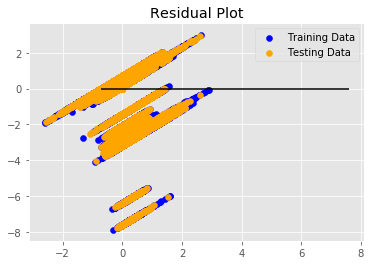

In [130]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [132]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7897204540697439, R2: 0.11672837890022188


Normal Neural Network - No hidden nodes

In [135]:
y = data_binary_encoded["Response"]

In [136]:
X = data_binary_encoded
del X["Response"]

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [149]:
X_train.shape

(44535, 135)

In [152]:
y_train_categorical.shape

(44535, 8)

In [153]:
# first, create a normal neural network with 135 inputs, 100 hidden nodes, and 8 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=135))
model.add(Dense(units=8, activation='softmax'))

In [154]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
 - 3s - loss: 1.4795 - acc: 0.4642
Epoch 2/60
 - 3s - loss: 1.3336 - acc: 0.5126
Epoch 3/60
 - 3s - loss: 1.2946 - acc: 0.5263
Epoch 4/60
 - 3s - loss: 1.2672 - acc: 0.5357
Epoch 5/60
 - 3s - loss: 1.2501 - acc: 0.5425
Epoch 6/60
 - 3s - loss: 1.2341 - acc: 0.5497
Epoch 7/60
 - 3s - loss: 1.2205 - acc: 0.5543
Epoch 8/60
 - 3s - loss: 1.2096 - acc: 0.5596
Epoch 9/60
 - 3s - loss: 1.1991 - acc: 0.5625
Epoch 10/60
 - 3s - loss: 1.1909 - acc: 0.5665
Epoch 11/60
 - 3s - loss: 1.1836 - acc: 0.5680
Epoch 12/60
 - 3s - loss: 1.1760 - acc: 0.5713
Epoch 13/60
 - 3s - loss: 1.1689 - acc: 0.5750
Epoch 14/60
 - 3s - loss: 1.1615 - acc: 0.5771
Epoch 15/60
 - 3s - loss: 1.1577 - acc: 0.5792
Epoch 16/60
 - 3s - loss: 1.1511 - acc: 0.5809
Epoch 17/60
 - 3s - loss: 1.1467 - acc: 0.5820
Epoch 18/60
 - 4s - loss: 1.1422 - acc: 0.5848
Epoch 19/60
 - 3s - loss: 1.1375 - acc: 0.5863
Epoch 20/60
 - 3s - loss: 1.1345 - acc: 0.5863
Epoch 21/60
 - 3s - loss: 1.1321 - acc: 0.5883
Epoch 22/60
 - 3s - lo

In [156]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               13600     
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 808       
Total params: 14,408
Trainable params: 14,408
Non-trainable params: 0
_________________________________________________________________


In [157]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)

print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 1.5637894398790637, Accuracy: 0.4871345817055099


Deep Neural Network - 3 Hidden Nodes

In [162]:
deep_model = Sequential()

deep_model.add(Dense(units=100, activation='relu', input_dim=135))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=8, activation='softmax'))

In [163]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               13600     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 808       
Total params: 34,608
Trainable params: 34,608
Non-trainable params: 0
_________________________________________________________________


In [164]:
deep_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
 - 4s - loss: 1.4285 - acc: 0.4767
Epoch 2/50
 - 4s - loss: 1.3055 - acc: 0.5207
Epoch 3/50
 - 4s - loss: 1.2669 - acc: 0.5362
Epoch 4/50
 - 4s - loss: 1.2375 - acc: 0.5487
Epoch 5/50
 - 4s - loss: 1.2118 - acc: 0.5592
Epoch 6/50
 - 4s - loss: 1.1844 - acc: 0.5658
Epoch 7/50
 - 4s - loss: 1.1579 - acc: 0.5770
Epoch 8/50
 - 4s - loss: 1.1341 - acc: 0.5867
Epoch 9/50
 - 4s - loss: 1.1069 - acc: 0.5956
Epoch 10/50
 - 4s - loss: 1.0821 - acc: 0.6053
Epoch 11/50
 - 4s - loss: 1.0566 - acc: 0.6144
Epoch 12/50
 - 4s - loss: 1.0326 - acc: 0.6243
Epoch 13/50
 - 4s - loss: 1.0111 - acc: 0.6311
Epoch 14/50
 - 4s - loss: 0.9898 - acc: 0.6412
Epoch 15/50
 - 4s - loss: 0.9670 - acc: 0.6504
Epoch 16/50
 - 4s - loss: 0.9467 - acc: 0.6560
Epoch 17/50
 - 4s - loss: 0.9294 - acc: 0.6633
Epoch 18/50
 - 4s - loss: 0.9125 - acc: 0.6695
Epoch 19/50
 - 4s - loss: 0.8979 - acc: 0.6741
Epoch 20/50
 - 4s - loss: 0.8786 - acc: 0.6808
Epoch 21/50
 - 4s - loss: 0.8625 - acc: 0.6867
Epoch 22/50
 - 4s - lo

In [165]:
model_loss, model_accuracy = deep_model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 2.797454289215748, Accuracy: 0.4444968341560549


Decision Trees/Random Forest

In [181]:
from sklearn import tree

In [182]:
target = data_binary_encoded["Response"]

In [183]:
data = data_binary_encoded
del data["Response"]

In [188]:
feature_names = data.columns

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [185]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.40744981813283038

In [186]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.53792267277381112

In [189]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10050387260727169, 'BMI'),
 (0.070452213384097212, 'Wt'),
 (0.051248550969743414, 'Ins_Age'),
 (0.045712532628103569, 'Product_Info_4'),
 (0.044559582959521775, 'Employment_Info_1'),
 (0.037996550860353494, 'Ht'),
 (0.037925505546240433, 'Medical_History_2'),
 (0.037856172730597624, 'Employment_Info_6'),
 (0.037016005347780198, 'Medical_History_1'),
 (0.027954708341766416, 'Medical_History_4'),
 (0.027010719017389183, 'InsuredInfo_3'),
 (0.0202603068346097, 'Employment_Info_2'),
 (0.017757046607058787, 'Medical_Keyword_15'),
 (0.016999111872318447, 'Medical_History_23'),
 (0.011840448704537159, 'Family_Hist_1'),
 (0.01153026466513769, 'Employment_Info_4'),
 (0.010561811026846734, 'Insurance_History_8'),
 (0.010306637969064612, 'Medical_History_41'),
 (0.010123027218568663, 'InsuredInfo_6'),
 (0.0095995300588025828, 'Insurance_History_4'),
 (0.0092122622818814684, 'Medical_History_9'),
 (0.0089791259985278569, 'Medical_Keyword_3'),
 (0.0086567374223497813, 'InsuredInfo_1'),
 (0.0085